In [1]:
# 1D Minimizing

import numpy as np
import matplotlib.pyplot as plt

On trouve beaucoup de fonctions dans le module optimize. Certaines permettent de faire des minimisations locales, ou globales, d'autres permette de développer des modeles statistiques avec la méthode des moindres carrés. On trouve également des fonctions pour faire de la programmation linéaire.

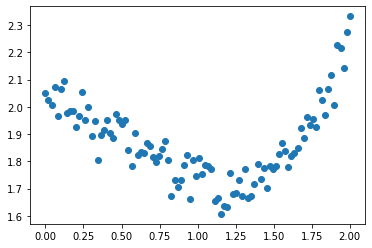

In [2]:
# Création d'un Dataset avec du bruit "normal"
x = np.linspace(0, 2, 100)
y = 1/3*x**3 - 3/5 * x**2 + 2 + np.random.randn(x.shape[0])/20
plt.scatter(x, y)

In [3]:
# Définition d'un modele statistique sensé "coller" au dataset ci-dessus
def f (x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [4]:
from scipy import optimize

In [5]:
# curve_fit permet de trouver les parametres du modele f grace a la méthode des moindres carrés
params, param_cov = optimize.curve_fit(f, x, y)

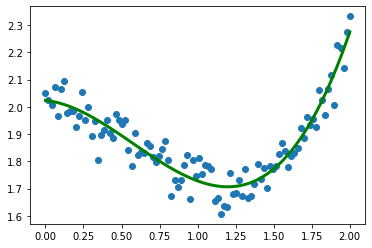

In [6]:
# Visualisation des résultats.
plt.scatter(x, y)
plt.plot(x, f(x, params[0], params[1], params[2], params[3]), c='g', lw=3)

In [7]:
# Définition d'une fonction a 1 Dimension
def f (x):
    return x**2 + 15*np.sin(x)

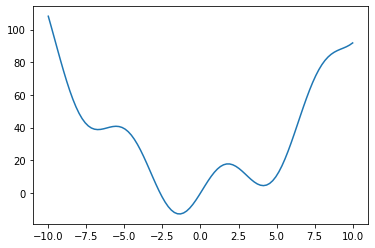

In [8]:
# Visualisation de la fonction
x = np.linspace(-10, 10, 100)
plt.plot(x, f(x))

In [9]:
# Définition d'un point x0 pour l'algorithme de minimisation
x0=-5
result = optimize.minimize(f, x0=x0).x # résultat de la minimisation

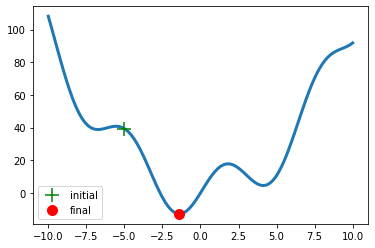

In [10]:
# Visualisation du résultat

plt.plot(x, f(x), lw=3, zorder=-1) # Courbe de la fonction
plt.scatter(x0, f(x0), s=200, marker='+', c='g', zorder=1, label='initial') # point initial
plt.scatter(result, f(result), s=100, c='r', zorder=1, label='final') # point final
plt.legend()
plt.show()

In [11]:
# Définition d'une fonction 2D. X est un tableau numpy a 2-Dimension
def f (x):
    return np.sin(x[0]) + np.cos(x[0]+x[1])*np.cos(x[0])

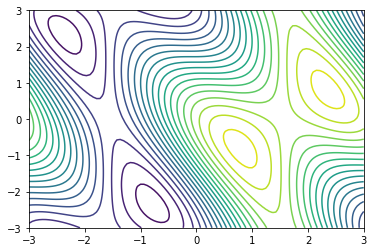

In [12]:
# Génération de la fonction sur un espace 2D.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

# Visualisation de la fonction
plt.contour(x, y, f(np.array([x, y])), 20)

le minimum est aux coordonées [-0.78539917 -2.35619344]


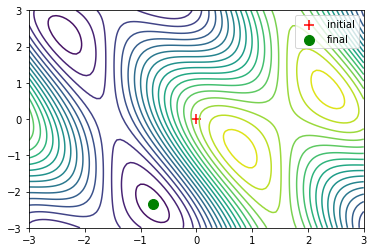

In [13]:
# Placement d'un point x0 initial aux coordonées (0,0)
x0 = np.zeros((2, 1))

# Minimisation de la fonction
result = optimize.minimize(f, x0=x0).x
print('le minimum est aux coordonées', result) # imprimer le résultat

# Visualisation du résultat
plt.contour(x, y, f(np.array([x, y])), 20) # fonction 2D
plt.scatter(x0[0], x0[1], marker='+', c='r', s=100, label='initial') # Point de départ
plt.scatter(result[0], result[1], c='g', s=100, label='final') # Point final
plt.legend()
plt.show()